In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("Website_Behaviour_Analysis.csv")

In [3]:
df

,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value,User_rank
0,26.025000,8,2,0.250000,60.96,15.240000
1,54.915333,13,5,0.384615,216.12,83.123077
2,10.063067,5,1,0.200000,53.24,10.648000
3,14.423817,20,2,0.100000,52.48,5.248000
4,6.134383,18,2,0.111111,111.98,12.442222
...,...,...,...,...,...,...
40393,1375.294917,2,1,0.500000,38.68,19.340000
40394,1393.450650,11,1,0.090909,42.72,3.883636
40395,1394.943733,5,2,0.400000,104.28,41.712000
40396,1373.752567,13,1,0.076923,35.48,2.729231


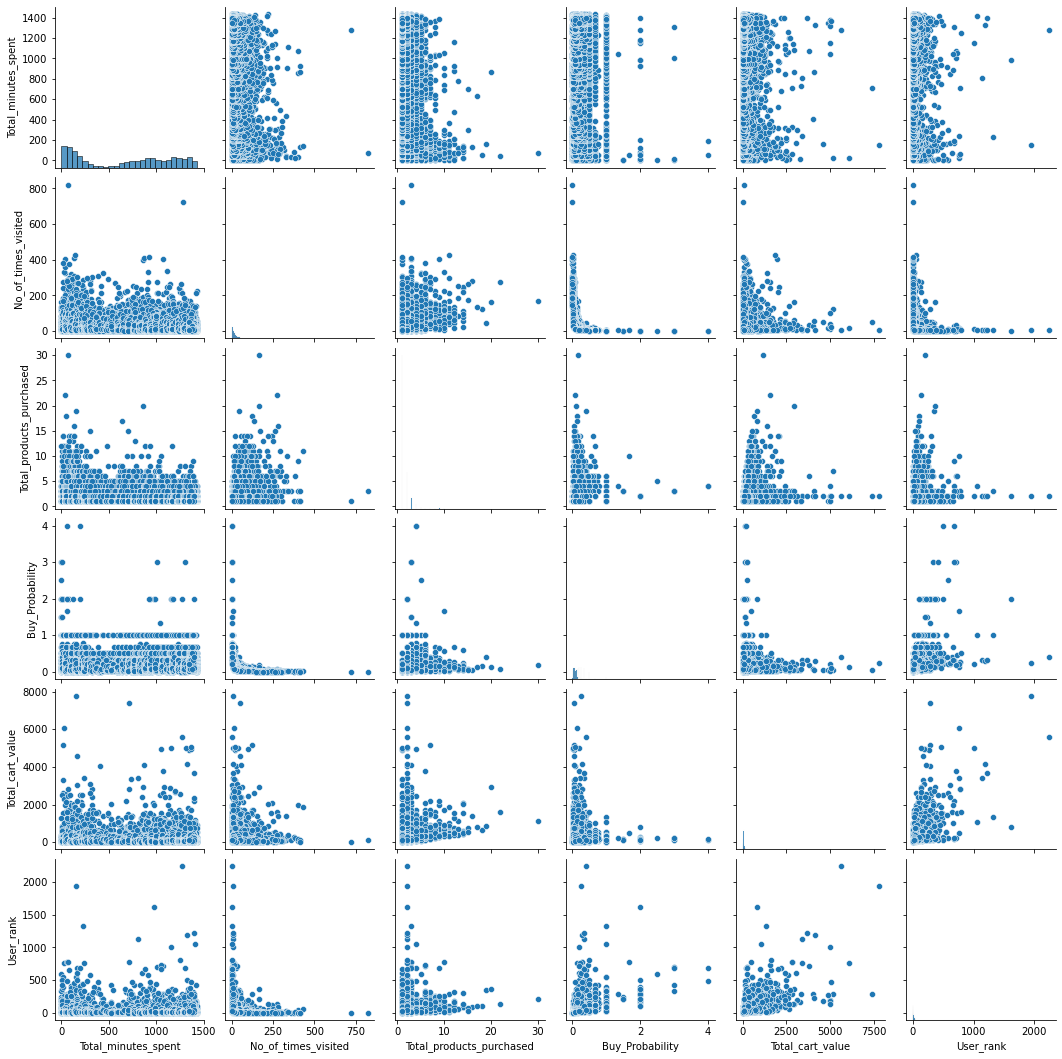

In [5]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop(['User_rank'],axis=1)
y = df['User_rank']

In [6]:
X.head()

,Total_minutes_spent,No_of_times_visited,Total_products_purchased,Buy_Probability,Total_cart_value
0,26.025000,8,2,0.250000,60.96
1,54.915333,13,5,0.384615,216.12
2,10.063067,5,1,0.200000,53.24
3,14.423817,20,2,0.100000,52.48
4,6.134383,18,2,0.111111,111.98


In [7]:
y.head()

0    15.240000
1    83.123077
2    10.648000
3     5.248000
4    12.442222
Name: User_rank, dtype: float64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [9]:
X_train.shape

(28278, 5)

In [10]:
X_test.shape

(12120, 5)

### RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

## predicting on train data
pred_train = rf.predict(X_train)

prediction_rf = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])

In [13]:
prediction_rf

,Predicted,Actual
30679,10.571357,10.566667
1299,4.496347,4.477241
13248,5.461954,5.531250
33345,12.851429,12.851429
10096,37.713522,37.644444
...,...,...
40059,14.960740,14.990000
28017,10.872156,10.898000
29199,1.460907,1.462857
40061,8.371111,8.371111


In [14]:
accuracy_rf = r2_score(y_train,pred_train)
accuracy_rf

0.9879773139084048

In [15]:
pred_test = rf.predict(X_test)

prediction_rf_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])

In [16]:
prediction_rf_test

,Predicted,Actual
35402,4.945017,4.950000
23925,7.094000,7.094000
36150,6.162222,6.162222
9800,51.020040,51.571429
29862,18.838011,18.875000
...,...,...
9722,4.740000,4.740000
27525,5.811866,5.872000
25764,1.060653,1.061667
35605,3.996200,3.997143


In [17]:
accuracy_rf_test = r2_score(y_test,pred_test)
accuracy_rf_test

0.9103317134469182

### Model evaluation Metrics

In [18]:
evl_metric_rf_train = pd.DataFrame({'Model':'RandomForest_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [19]:
evl_metric_rf_test = pd.DataFrame({'Model':'RandomForest_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [20]:
evl_metric_rf_test

,Model,RMSE,MAE,R2_score
0,RandomForest_test,11.485691,131.921087,0.910332


In [21]:
rf_model_metric_no_tuning = pd.concat([evl_metric_rf_train,evl_metric_rf_test],ignore_index=True)
rf_model_metric_no_tuning

,Model,RMSE,MAE,R2_score
0,RandomForest_train,4.037738,16.303326,0.987977
1,RandomForest_test,11.485691,131.921087,0.910332


## Hyperparameter Tuning RandomForest

In [23]:
from sklearn.model_selection import GridSearchCV

n_estimators = [150,200,250]
max_features = ['sqrt']
max_depth = [10,15,20]
min_samples_split =[5,10,15]
min_samples_leaf = [1,3,5]
bootstrap = [True]

param = {'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf,
        'bootstrap':bootstrap}

gridseach_cv_rf = GridSearchCV(rf,param_grid=param,cv=4,verbose=3)
gridseach_cv_rf.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV 1/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.842 total time=   5.6s
[CV 2/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.842 total time=   5.6s
[CV 3/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.953 total time=   5.6s
[CV 4/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.922 total time=   5.5s
[CV 1/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.824 total time=   7.4s
[CV 2/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.820 total time=   7.4s
[CV 3/4] END bootstr

[CV 2/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.788 total time=   2.2s
[CV 3/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.933 total time=   2.2s
[CV 4/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.922 total time=   2.2s
[CV 1/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.770 total time=   2.9s
[CV 2/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.782 total time=   2.9s
[CV 3/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.926 total time=   2.8s
[CV 4/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 4/4] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.908 total time=   3.1s
[CV 1/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.822 total time=   2.5s
[CV 2/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.833 total time=   2.5s
[CV 3/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.957 total time=   2.7s
[CV 4/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.932 total time=   2.4s
[CV 1/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.814 total time=   3.8s
[CV 2/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1,

[CV 2/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.789 total time=   3.1s
[CV 3/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.935 total time=   3.1s
[CV 4/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.921 total time=   3.1s
[CV 1/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.756 total time=   3.9s
[CV 2/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.794 total time=   3.9s
[CV 3/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.936 total time=   3.8s
[CV 4/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_le

[CV 4/4] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.902 total time=   3.6s
[CV 1/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.806 total time=   2.6s
[CV 2/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.831 total time=   2.7s
[CV 3/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.962 total time=   2.6s
[CV 4/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.935 total time=   2.7s
[CV 1/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.814 total time=   3.5s
[CV 2/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1,

[CV 2/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.795 total time=   3.2s
[CV 3/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.934 total time=   3.2s
[CV 4/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.920 total time=   3.2s
[CV 1/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.765 total time=   4.0s
[CV 2/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.792 total time=   4.1s
[CV 3/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250;, score=0.936 total time=   4.0s
[CV 4/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 4/4] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=250;, score=0.908 total time=   3.9s


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [150, 200, 250]},
             verbose=3)

In [24]:
gridseach_cv_rf.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [25]:
rf_tuned = RandomForestRegressor(**gridseach_cv_rf.best_params_)
rf_tuned.fit(X_train,y_train)
pred_rf_tune = rf_tuned.predict(X_test)

In [26]:
evl_metric_rf_tuned = pd.DataFrame({'Model':'RandomForest_tuned','RMSE':np.sqrt(mean_squared_error(y_test,pred_rf_tune)),
                                    "MAE":mean_squared_error(y_test,pred_rf_tune),
                                   "R2_score":r2_score(y_test,pred_rf_tune)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [27]:
evl_metric_rf_tuned

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned,13.647005,186.240742,0.87341


In [28]:
pred_rf_tune_train = rf_tuned.predict(X_train)

In [29]:
evl_metric_rf_tuned_train = pd.DataFrame({'Model':'RandomForest_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_rf_tune_train)),
                                    "MAE":mean_squared_error(y_train,pred_rf_tune_train),
                                   "R2_score":r2_score(y_train,pred_rf_tune_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [30]:
rf_model_metric_tuning = pd.concat([evl_metric_rf_tuned_train,evl_metric_rf_tuned],ignore_index=True)

In [31]:
rf_model_metric_tuning

,Model,RMSE,MAE,R2_score
0,RandomForest_tuned_train,6.865026,47.128582,0.965246
1,RandomForest_tuned,13.647005,186.240742,0.873410


In [32]:
import pickle
with open('rf_tune.pickle', 'wb') as fp:
    pickle.dump(rf_tuned, fp)

In [33]:
rf_model_metric = pd.concat([rf_model_metric_no_tuning,rf_model_metric_tuning],ignore_index=True)
rf_model_metric

,Model,RMSE,MAE,R2_score
0,RandomForest_train,4.037738,16.303326,0.987977
1,RandomForest_test,11.485691,131.921087,0.910332
2,RandomForest_tuned_train,6.865026,47.128582,0.965246
3,RandomForest_tuned,13.647005,186.240742,0.873410


In [ ]:
Note : we still see overfitting with random forest algorithm

### Feature importance

<AxesSubplot:title={'center':'Feature Importance'}>

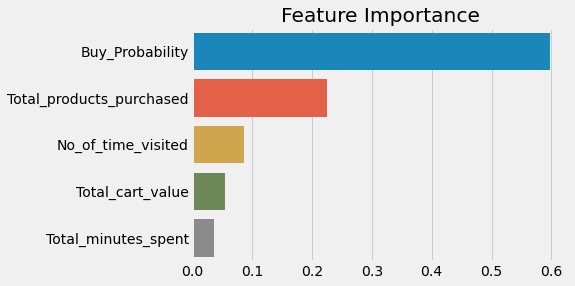

In [37]:
Feature_importance = pd.Series(data = rf_tuned.feature_importances_, 
                               index=['Total_minutes_spent',
                                      'No_of_time_visited',
                                      'Total_cart_value',
                                      'Total_products_purchased',
                                      'Buy_Probability']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance.index,x=Feature_importance.values,orient ='h')    

### Model Building XGBoost

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train,y_train)
pred_xg_train = xgb.predict(X_train)

In [42]:
evl_metric_xgb_train = pd.DataFrame({'Model':'xgb_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_xg_train)),
                                    "MAE":mean_squared_error(y_train,pred_xg_train),
                                   "R2_score":r2_score(y_train,pred_xg_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [43]:
evl_metric_xgb_train

,Model,RMSE,MAE,R2_score
0,xgb_train,0.451199,0.203581,0.99985


In [44]:
pred_xg_test = xgb.predict(X_test)

In [45]:
evl_metric_xgb_test = pd.DataFrame({'Model':'xgb_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_xg_test)),
                                    "MAE":mean_squared_error(y_test,pred_xg_test),
                                   "R2_score":r2_score(y_test,pred_xg_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [46]:
evl_metric_xgb_test

,Model,RMSE,MAE,R2_score
0,xgb_test,9.859536,97.210448,0.933925


In [47]:
xgb_model_metric_no_tuning = pd.concat([evl_metric_xgb_train,evl_metric_xgb_test],ignore_index=True)
xgb_model_metric_no_tuning

,Model,RMSE,MAE,R2_score
0,xgb_train,0.451199,0.203581,0.999850
1,xgb_test,9.859536,97.210448,0.933925


In [ ]:
### XGBoost Hyperparameter Tuning

In [48]:
param_grid={
   
    'learning_rate':[0.1,0.3,0.5],
    'max_depth': [3,6,10],
    'n_estimators':[100,200,300],
    'reg_alpha':[0.25,0.50],
    'reg_lambda':[0.25,0.35],
    'subsample':[0.3,0.6]    
}

In [49]:
grid_xgb = GridSearchCV(XGBRegressor(objective='reg:squarederror'),param_grid =param_grid ,cv=3, verbose=3)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.877 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.849 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.943 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.927 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.909 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.969 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, 

[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.920 total time=   1.5s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.983 total time=   1.5s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.863 total time=   1.2s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.870 total time=   1.2s
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.971 total time=   1.2s
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.937 total time=   1.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.916 total time=   1.7s
[CV 

[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.971 total time=   1.3s
[CV 1/3] END learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.831 total time=   1.7s
[CV 2/3] END learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.903 total time=   1.7s
[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.982 total time=   1.7s
[CV 1/3] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.823 total time=   2.0s
[CV 2/3] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.850 total time=   1.9s
[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.967 total time=   1.9s
[CV

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.855 total time=   2.1s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.832 total time=   2.2s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.963 total time=   2.2s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.828 total time=   2.9s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.903 total time=   3.6s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.978 total time=   3.2s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.846 total time= 

[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.893 total time=   0.5s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.977 total time=   0.5s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.897 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.879 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.936 total time=   0.3s
[CV 1/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.931 total time=   0.5s
[CV 2/3] END learning_rate=0.3, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.889 total time=   0.4s
[CV 3/

[CV 3/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.950 total time=   0.7s
[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.814 total time=   0.9s
[CV 2/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.878 total time=   0.8s
[CV 3/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.968 total time=   0.9s
[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.833 total time=   0.6s
[CV 2/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.882 total time=   0.6s
[CV 3/3] END learning_rate=0.3, max_depth=6, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.955 total time=   0.7s

[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.826 total time=   2.2s
[CV 2/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.866 total time=   2.2s
[CV 3/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.955 total time=   2.1s
[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.813 total time=   3.2s
[CV 2/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.875 total time=   3.0s
[CV 3/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.969 total time=   3.0s
[CV 1/3] END learning_rate=0.3, max_depth=6, n_estimators=300, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.812 total time=   2.1s
[CV 2/

[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.896 total time=   3.2s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.972 total time=   3.2s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.852 total time=   3.4s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.834 total time=   3.4s
[CV 3/3] END learning_rate=0.3, max_depth=10, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.940 total time=   3.3s
[CV 1/3] END learning_rate=0.3, max_depth=10, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.797 total time=   6.4s
[CV 2/3] END learning_rate=0.3, max_depth=10, n_estimators=300, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.887 total time=  

[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.939 total time=   1.0s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.873 total time=   1.5s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.817 total time=   1.8s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.974 total time=   3.4s
[CV 1/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.870 total time=   1.9s
[CV 2/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.887 total time=   2.1s
[CV 3/3] END learning_rate=0.5, max_depth=3, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.939 total time=   1.8s
[C

[CV 1/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.807 total time=   0.7s
[CV 2/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.814 total time=   0.8s
[CV 3/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.936 total time=   0.7s
[CV 1/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.785 total time=   1.2s
[CV 2/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.881 total time=   1.2s
[CV 3/3] END learning_rate=0.5, max_depth=6, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.967 total time=   0.9s
[CV 1/3] END learning_rate=0.5, max_depth=6, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25, subsample=0.3;, score=0.836 total time=   1.6s
[CV 2

[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.883 total time=   1.6s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25, subsample=0.6;, score=0.957 total time=   1.6s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.810 total time=   1.2s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.764 total time=   1.1s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.3;, score=0.911 total time=   1.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.787 total time=   2.1s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=100, reg_alpha=0.25, reg_lambda=0.35, subsample=0.6;, score=0.871 total time=

[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.875 total time=   3.6s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.802 total time=   5.5s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.895 total time=   5.4s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.961 total time=   5.1s
[CV 1/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.772 total time=   3.7s
[CV 2/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.779 total time=   3.6s
[CV 3/3] END learning_rate=0.5, max_depth=10, n_estimators=300, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.926 total time=   3.9s

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [50]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'reg_lambda': 0.25,
 'subsample': 0.6}

In [51]:
xbg_tuned = XGBRegressor(**grid_xgb.best_params_)
xbg_tuned.fit(X_train,y_train)
pred_xg_tuned_train = xgb.predict(X_train)
pred_xg_tuned_test = xgb.predict(X_test)

In [52]:
filename = 'xgboost_model.pickle'
pickle.dump(xbg_tuned, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [53]:
evl_metric_xgb_tuned_train = pd.DataFrame({'Model':'xgb_tuned_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_xg_tuned_train)),
                                    "MAE":mean_squared_error(y_train,pred_xg_tuned_train),
                                   "R2_score":r2_score(y_train,pred_xg_tuned_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [54]:
evl_metric_xgb_tuned_test = pd.DataFrame({'Model':'xgb_tuned_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_xg_tuned_test)),
                                    "MAE":mean_squared_error(y_test,pred_xg_tuned_test),
                                   "R2_score":r2_score(y_test,pred_xg_tuned_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [55]:
xgb_metric_tuned = pd.concat([evl_metric_xgb_tuned_train,evl_metric_xgb_tuned_test],ignore_index=True)
xgb_metric_tuned

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.451199,0.203581,0.999850
1,xgb_tuned_test,9.859536,97.210448,0.933925


In [56]:
xgb_metric = pd.concat([xgb_metric_tuned,xgb_model_metric_no_tuning],ignore_index=True)
xgb_metric

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.451199,0.203581,0.999850
1,xgb_tuned_test,9.859536,97.210448,0.933925
2,xgb_train,0.451199,0.203581,0.999850
3,xgb_test,9.859536,97.210448,0.933925


<AxesSubplot:title={'center':'Feature Importance'}>

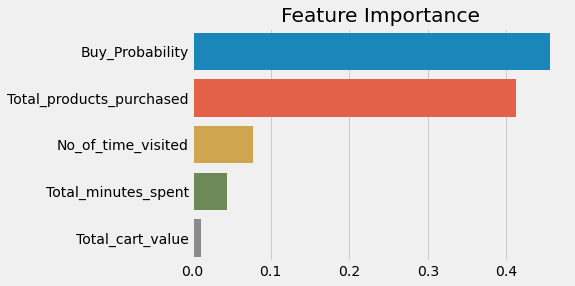

In [58]:
Feature_importance_xgb = pd.Series(data = xbg_tuned.feature_importances_, 
                               index=['Total_minutes_spent',
                                      'No_of_time_visited',
                                      'Total_cart_value',
                                      'Total_products_purchased',
                                      'Buy_Probability']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_xgb.index,x=Feature_importance_xgb.values,orient ='h')

In [ ]:
### Model Evaluation

In [59]:
model_metric = pd.concat([xgb_metric,rf_model_metric],ignore_index=True)
model_metric

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.451199,0.203581,0.999850
1,xgb_tuned_test,9.859536,97.210448,0.933925
2,xgb_train,0.451199,0.203581,0.999850
3,xgb_test,9.859536,97.210448,0.933925
4,RandomForest_train,4.037738,16.303326,0.987977
5,RandomForest_test,11.485691,131.921087,0.910332
6,RandomForest_tuned_train,6.865026,47.128582,0.965246
7,RandomForest_tuned,13.647005,186.240742,0.873410


In [60]:
model_metric.sort_values(by='RMSE',ascending=True)

,Model,RMSE,MAE,R2_score
0,xgb_tuned_train,0.451199,0.203581,0.999850
2,xgb_train,0.451199,0.203581,0.999850
4,RandomForest_train,4.037738,16.303326,0.987977
6,RandomForest_tuned_train,6.865026,47.128582,0.965246
1,xgb_tuned_test,9.859536,97.210448,0.933925
3,xgb_test,9.859536,97.210448,0.933925
5,RandomForest_test,11.485691,131.921087,0.910332
7,RandomForest_tuned,13.647005,186.240742,0.873410


#### Conclusion
- Data is trained with Random forest and XGBoost.
- Accuracy achieved 
- 99% with training data
- 93% with test data
- We see overfitting in the data 

#### Future Improvements:
- Need to find more features
- Try with different hyperparameters.
